# The ``together`` Argument

In the previous example for PyROA, we fit all light curves to the ROA model simultaneously. However, in some circumstances, the user may want to fit each light curve to the continuum individually. pyPetal accounts for this using the ``together`` argument in the PyROA module.

If ``together=True``, PyROA will fit all light curves to the continuum (individually) simultaneously. pypetal will save all light curves to be used in PyROA in the ``output_dir/pyroa_lcs/`` directory, and all files/figures in the ``output_dir/pyroa/`` directory.

If ``together=False``, PyROA will fit each light curve to the continuum separately. Like the previous case, the light curves to be used for PyROA will be saved to ``output_dir/pyroa_lcs/``. However, the PyROA files and figures for each line will now be saved in ``output_dir/(line_name)/pyroa/``, where ``(line_name)`` is the name for each line.

In addition, some arguments (``add_var``, ``delay_dist``) may be input as arrays instead of values, for each line. However, if one value is given, it will apply to all lines.

We've seen ``together=True`` in the basic example, so now we'll set ``together=False``:

In [1]:
%matplotlib inline
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/javelin_'
line_names = ['continuum', 'yelm', 'zing']
filenames = [ main_dir + x + '.dat' for x in line_names ]

output_dir = 'pyroa_output2/'


Running PyROA
----------------
nburn: 7000
nchain: 10000
init_tau: [80, 150]
subtract_mean: False
div_mean: False
add_var: [True, True]
delay_dist: [False, False]
psi_types: ['Gaussian', 'Gaussian']
together: False
objname: pyroa
----------------
        
Initial Parameter Values
     A0       B0    σ0       A1       B1    τ1    σ1    Δ
-------  -------  ----  -------  -------  ----  ----  ---
2.30824  9.92677  0.01  1.19302  5.10527    80  0.01   10
NWalkers=18


100%|██████████| 10000/10000 [40:13<00:00,  4.14it/s]


Filter: continuum
Delay, error: 0.00 (fixed)
Filter: yelm
Delay, error:  100.80177  (+   1.52500 -   1.50212)


Best Fit Parameters
     A0       B0        σ0      A1       B1       τ1        σ1        Δ
-------  -------  --------  ------  -------  -------  --------  -------
2.16544  10.1648  0.369855  1.0844  5.10848  100.802  0.188084  13.5799
Initial Parameter Values
     A0       B0    σ0      A1       B1    τ1    σ1    Δ
-------  -------  ----  ------  -------  ----  ----  ---
2.30824  9.92677  0.01  0.5882  2.44884   150  0.01   10
NWalkers=18


100%|██████████| 10000/10000 [40:26<00:00,  4.12it/s]


Filter: continuum
Delay, error: 0.00 (fixed)
Filter: zing
Delay, error:  250.31817  (+   1.05027 -   1.12401)


Best Fit Parameters
     A0       B0        σ0        A1       B1       τ1         σ1        Δ
-------  -------  --------  --------  -------  -------  ---------  -------
2.41656  9.89386  0.335357  0.602175  2.47354  250.318  0.0823911  12.0856


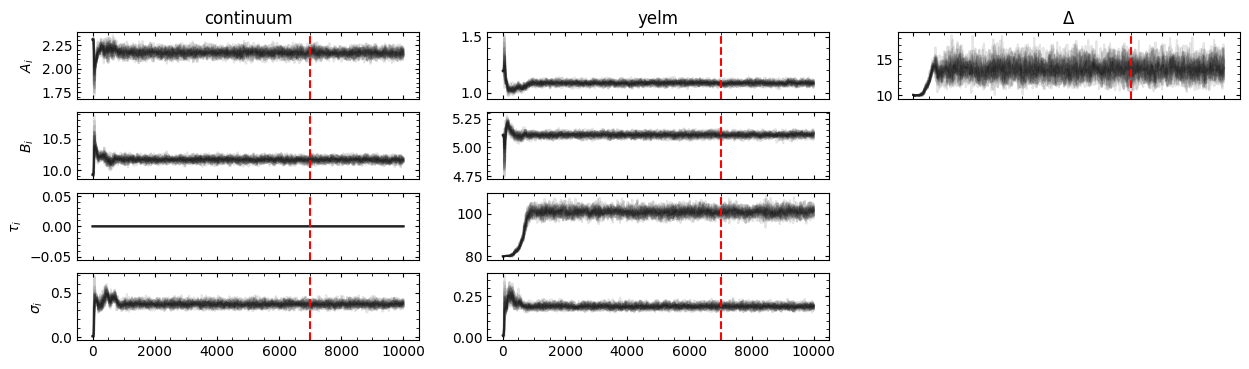

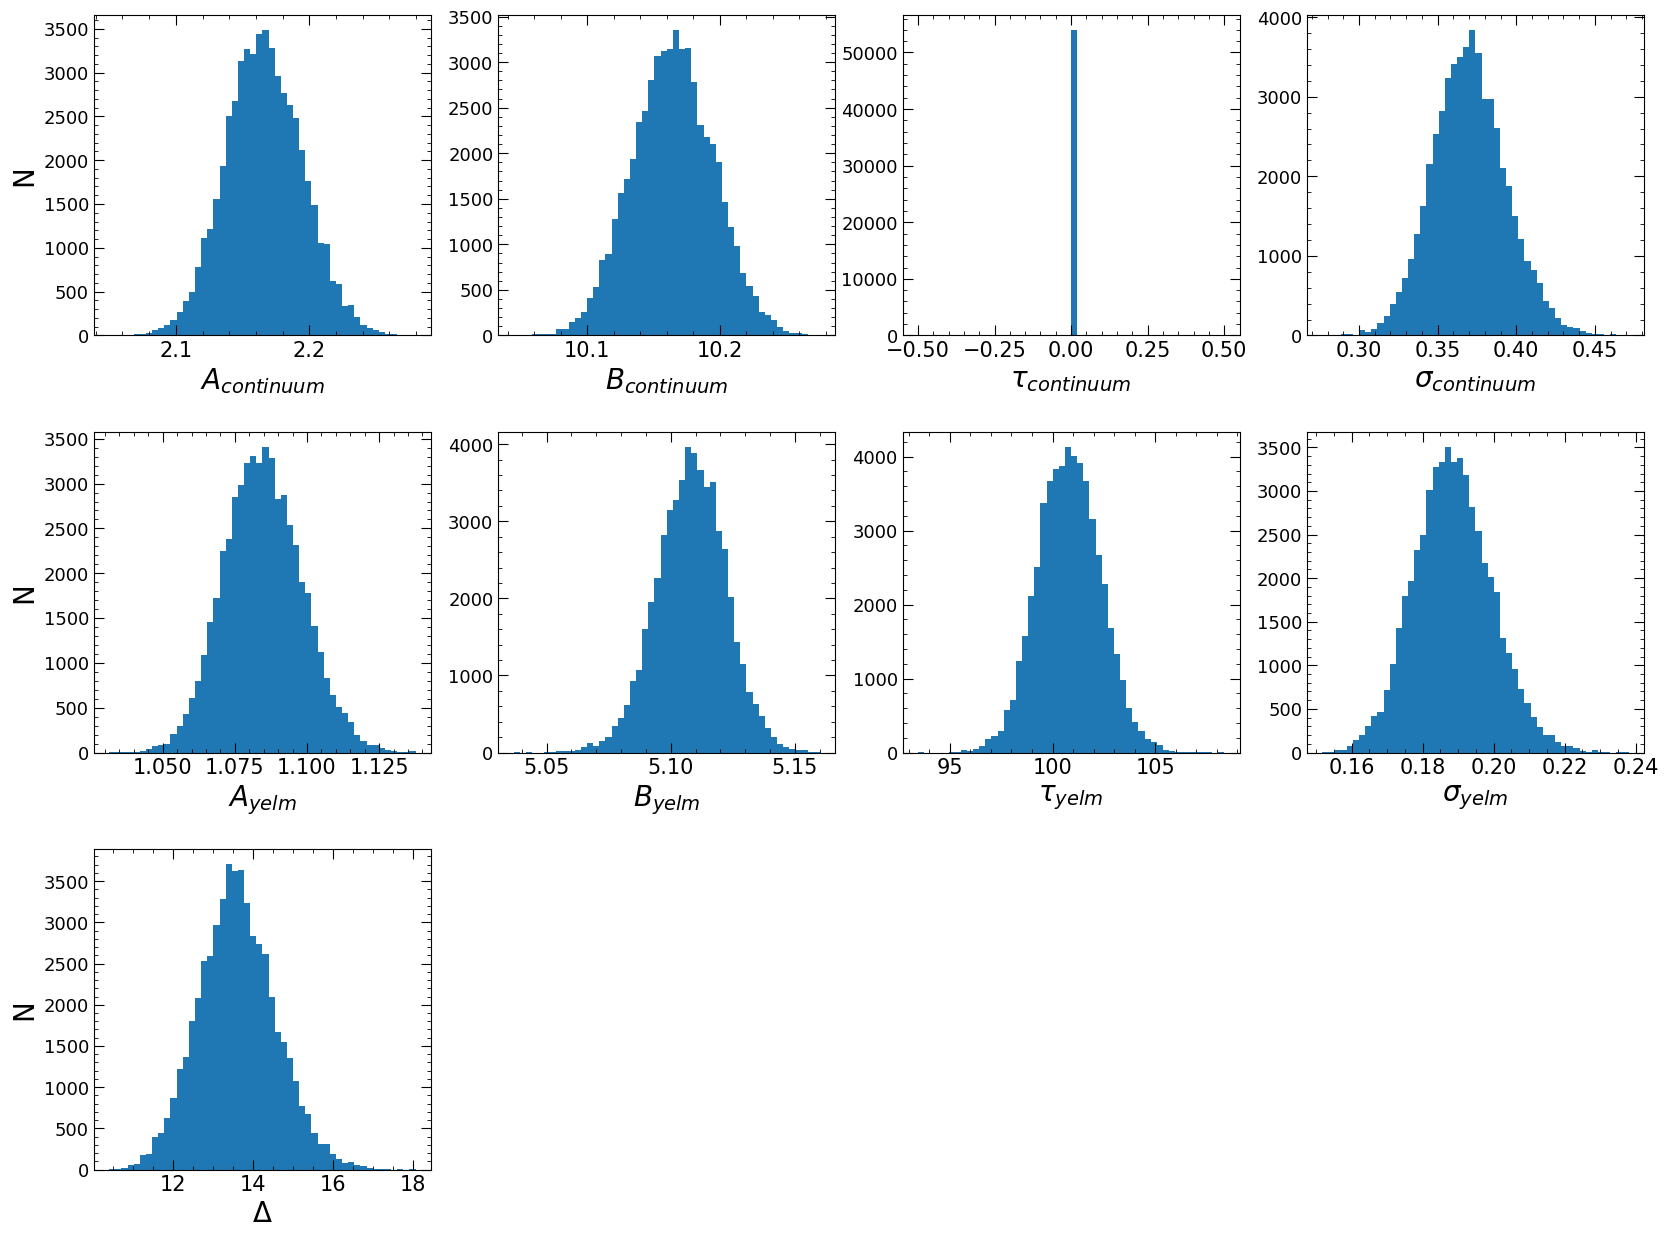

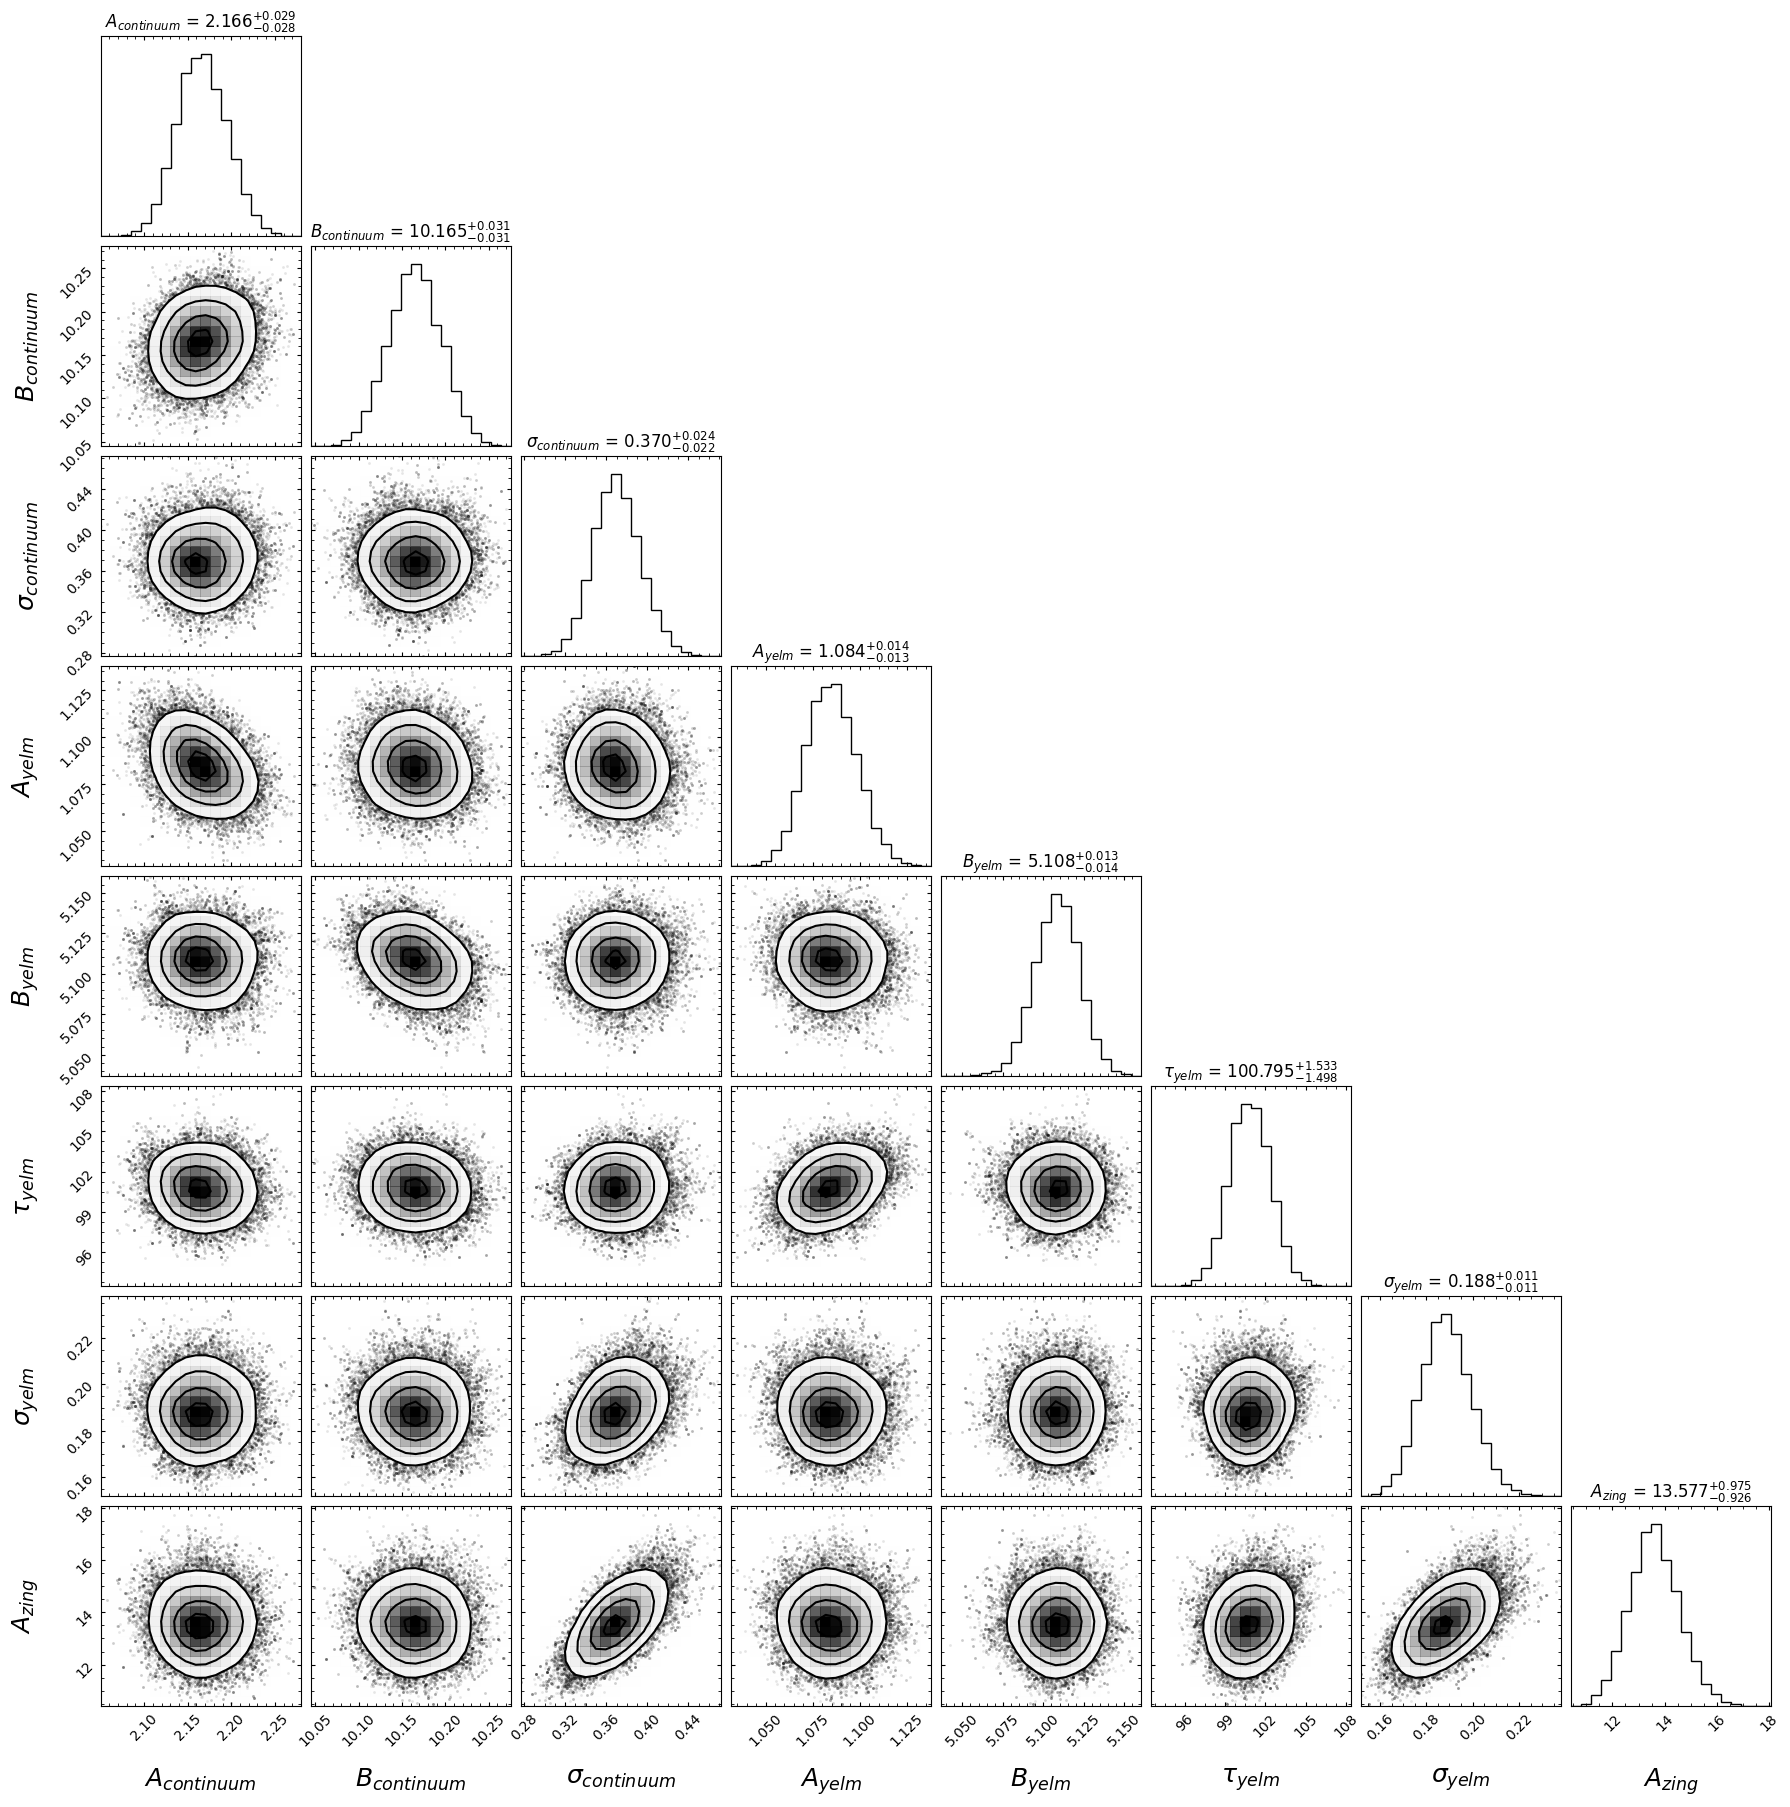

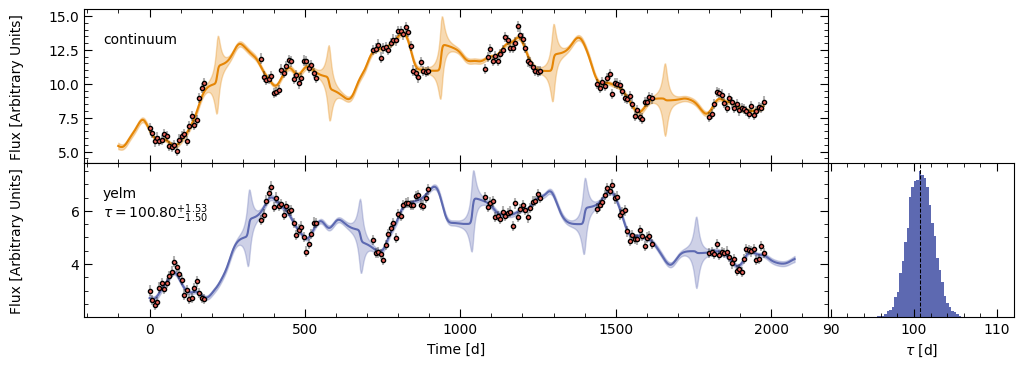

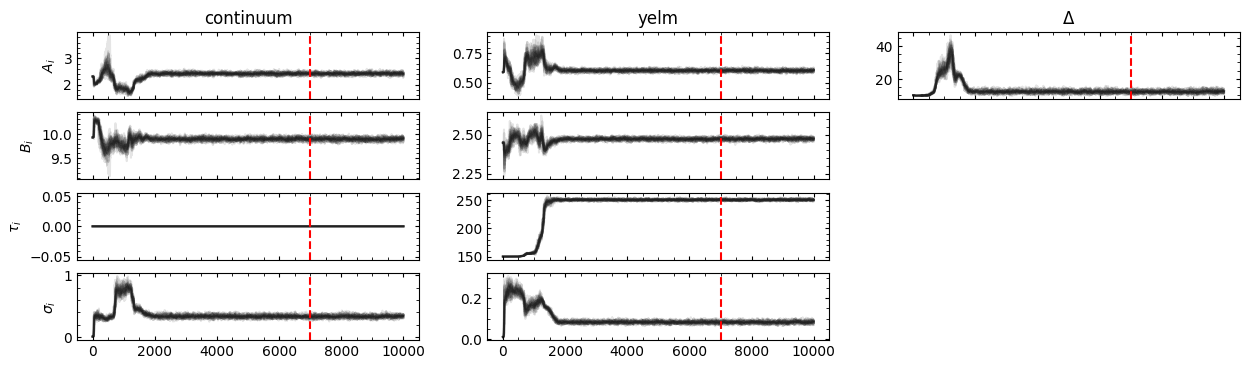

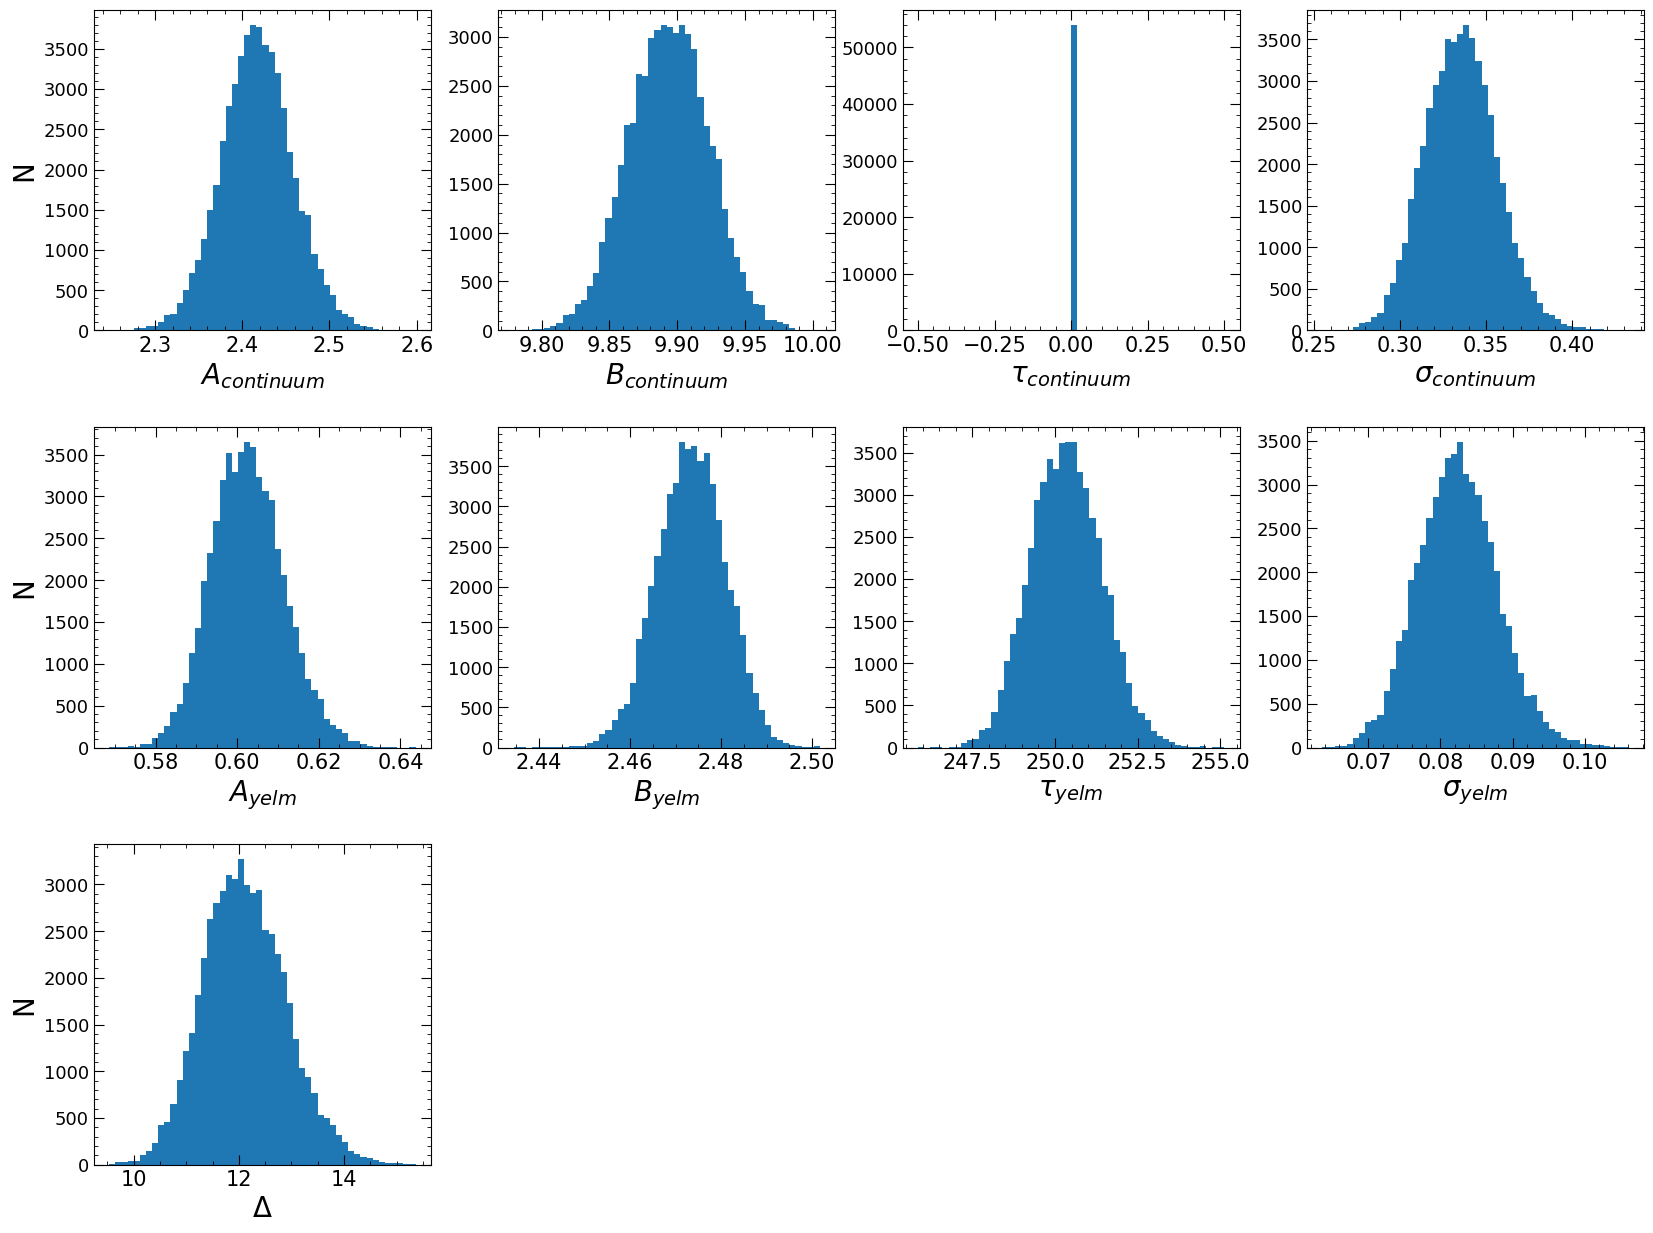

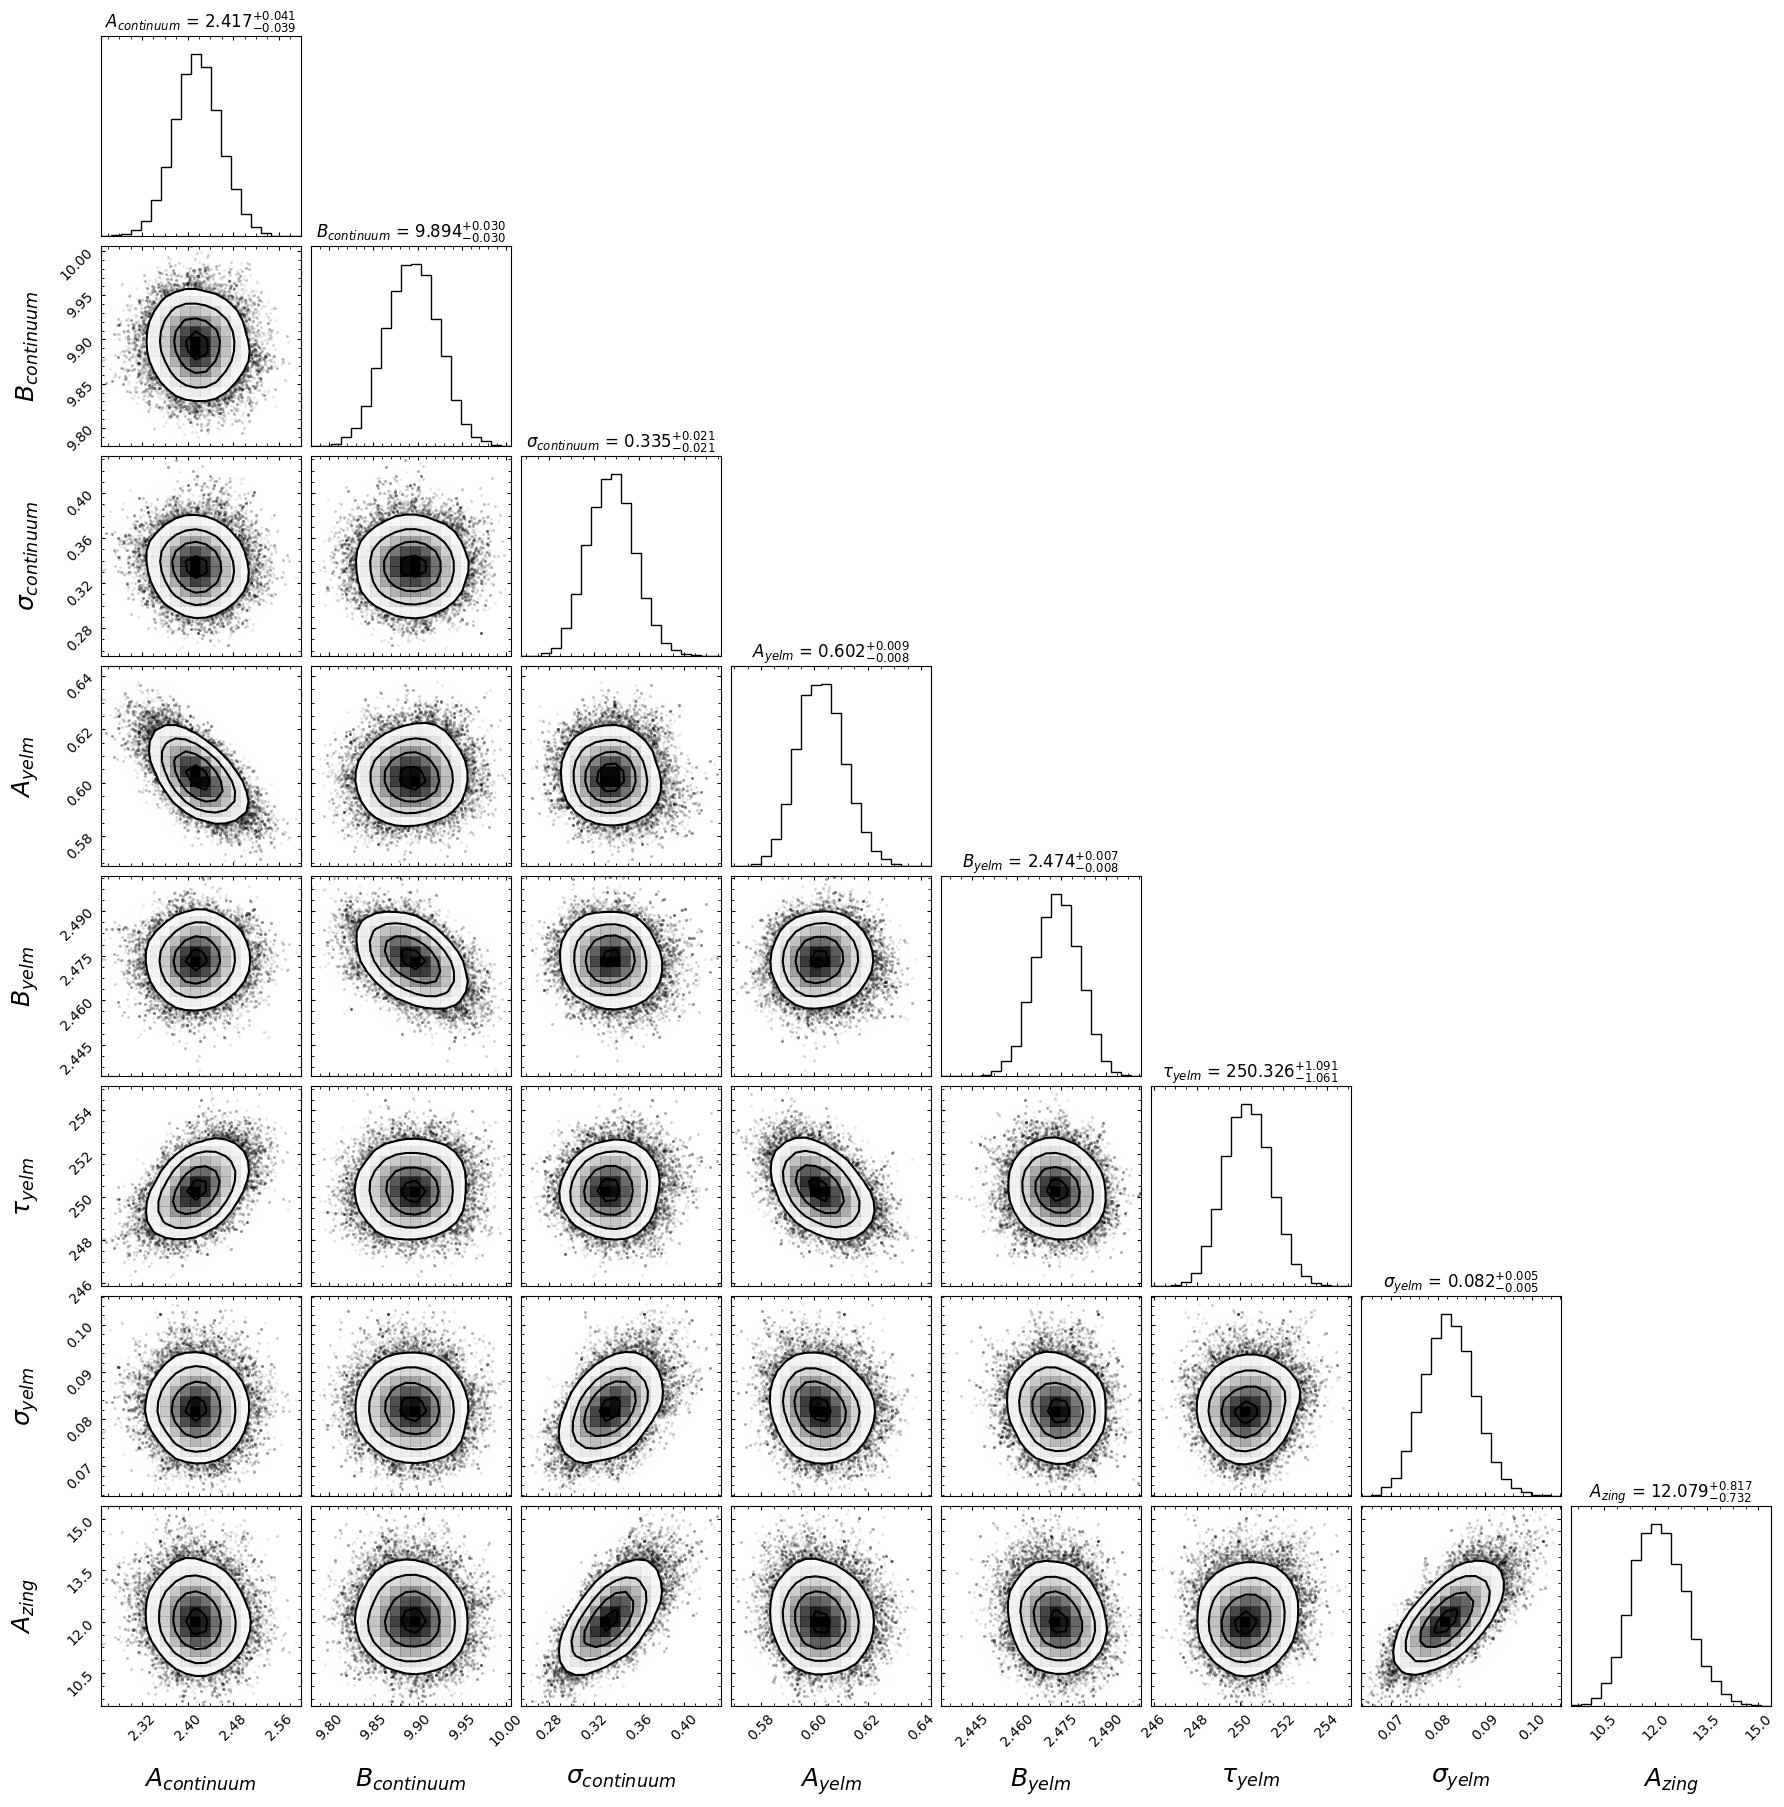

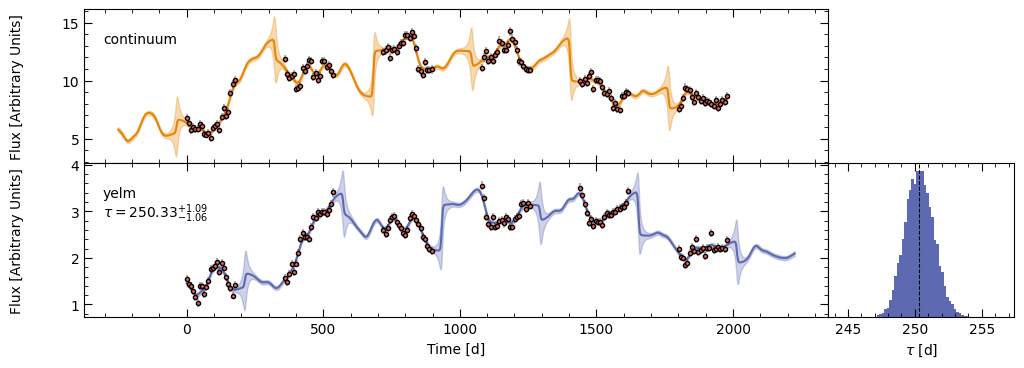

In [2]:
params = {
    'nchain': 10000,
    'nburn': 7000,
    'together': False,
    'subtract_mean': False,
    'add_var': True,
    'delay_dist': False,
    'init_tau': [80, 150]
}

res = pl.run_pipeline( output_dir, filenames, line_names,
                      run_pyroa=True, pyroa_params=params,
                      verbose=True, plot=True,
                      file_fmt='ascii', lag_bounds=['baseline', [0,500]])

The output under the "pyroa_res" key in the output dictionary will now be a list of ``MyFit`` results (one per line) instead of one.  

In [3]:
res['pyroa_res']

In addition, each result will fit the continuum (and hence the driving light curve model) separately. This gives a different "chunked" sample array for each line with the following form:

$[[A_{cont}, B_{cont}, \tau_{cont}, \sigma_{cont}],[A_{line}, B_{line}, \tau_{line}, \sigma_{line}],[\Delta]]$